In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-model/ChurnModel - Training DB 20201015.xlsx
/kaggle/input/churn-model/ChurnModel - Scoring DB 20201015.xlsx


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 

sns.set(style = 'white')

In [4]:
train = pd.read_excel('../input/churn-model/ChurnModel - Training DB 20201015.xlsx','Sheet1')

In [5]:
train.head()

,SK_CUSTOMER,Contact_End,StartDate,MonthlyFee,PROVINCE,LINE_OF_BUSINESS,Segment,GroupName,CustomerServiceCall,FalseAlarm,BillFreq,Service1,Service2,Service3,Service4,Service5,Service6,Churn
0,5,2022-08-23,2017-08-23 09:07:00,67.485,NS,Residential,58.0,Country Seniors,0,0,M,1.0,0.0,1.0,1.0,1.0,0.0,1
1,51,2021-01-16,2018-01-08 16:16:00,42.000,NS,Small Business,47.0,Families with Tweens,1,1,M,1.0,1.0,1.0,0.0,1.0,0.0,0
2,86,2020-11-22,2017-11-21 19:28:00,59.985,NB,Residential,68.0,Starter Nests,0,1,M,1.0,0.0,1.0,1.0,1.0,0.0,0
3,115,2020-09-28,2017-09-27 18:21:00,74.985,NS,Residential,50.0,Starter Nests,0,0,M,1.0,0.0,1.0,1.0,1.0,0.0,0
4,127,2022-09-15,2017-09-14 10:17:00,58.425,QC,Residential,55.0,Families with Tweens,0,0,M,0.0,1.0,1.0,1.0,0.0,0.0,0


In [6]:
train.shape

(15000, 18)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SK_CUSTOMER          15000 non-null  int64         
 1   Contact_End          15000 non-null  datetime64[ns]
 2   StartDate            15000 non-null  datetime64[ns]
 3   MonthlyFee           14995 non-null  float64       
 4   PROVINCE             15000 non-null  object        
 5   LINE_OF_BUSINESS     15000 non-null  object        
 6   Segment              14937 non-null  float64       
 7   GroupName            14937 non-null  object        
 8   CustomerServiceCall  15000 non-null  object        
 9   FalseAlarm           15000 non-null  int64         
 10  BillFreq             15000 non-null  object        
 11  Service1             14921 non-null  float64       
 12  Service2             14921 non-null  float64       
 13  Service3             14921 non-

In [8]:
missing_data = train.isnull().sum().sort_values(ascending=False)
percent = train.isnull().sum()/train.isnull().count().sort_values(ascending=False)
missing = pd.concat([missing_data, percent],axis=1, keys=('Total', 'Percent'))
missing.head(15)

,Total,Percent
Service5,79,0.005267
Service4,79,0.005267
Service3,79,0.005267
Service2,79,0.005267
Service1,79,0.005267
Service6,79,0.005267
GroupName,63,0.004200
Segment,63,0.004200
MonthlyFee,5,0.000333
Churn,0,0.000000


In [9]:
train.dropna(inplace=True)

In [10]:
train.shape

(14858, 18)

In [11]:
cols = ['Segment', 'Service1', 'Service2', 'Service3', 'Service4', 'Service5', 'Service6']
train[cols] = train[cols].astype('int64')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14858 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SK_CUSTOMER          14858 non-null  int64         
 1   Contact_End          14858 non-null  datetime64[ns]
 2   StartDate            14858 non-null  datetime64[ns]
 3   MonthlyFee           14858 non-null  float64       
 4   PROVINCE             14858 non-null  object        
 5   LINE_OF_BUSINESS     14858 non-null  object        
 6   Segment              14858 non-null  int64         
 7   GroupName            14858 non-null  object        
 8   CustomerServiceCall  14858 non-null  object        
 9   FalseAlarm           14858 non-null  int64         
 10  BillFreq             14858 non-null  object        
 11  Service1             14858 non-null  int64         
 12  Service2             14858 non-null  int64         
 13  Service3             14858 non-

In [13]:
ID = train['SK_CUSTOMER']

In [14]:
cols_drop = ['SK_CUSTOMER','Contact_End','StartDate']
train.drop(cols_drop, axis=1, inplace=True)

In [15]:
train.shape

(14858, 15)

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyFee,14858.0,56.998465,17.292922,0.0,46.605,55.86,64.485,426.14505
Segment,14858.0,23.462714,20.115052,1.0,6.000,17.00,37.000,69.00000
FalseAlarm,14858.0,0.072082,0.258633,0.0,0.000,0.00,0.000,1.00000
Service1,14858.0,0.171625,0.377067,0.0,0.000,0.00,0.000,1.00000
Service2,14858.0,0.140665,0.347687,0.0,0.000,0.00,0.000,1.00000
Service3,14858.0,0.304213,0.460089,0.0,0.000,0.00,1.000,1.00000
Service4,14858.0,0.340423,0.473867,0.0,0.000,0.00,1.000,1.00000
Service5,14858.0,0.211267,0.408221,0.0,0.000,0.00,0.000,1.00000
Service6,14858.0,0.153116,0.360112,0.0,0.000,0.00,0.000,1.00000
Churn,14858.0,0.052362,0.222764,0.0,0.000,0.00,0.000,1.00000


In [17]:
train.describe(exclude='number').T

,count,unique,top,freq
PROVINCE,14858,9,ON,9202
LINE_OF_BUSINESS,14858,3,Residential,13805
GroupName,14858,15,Prosperous Parents,3709
CustomerServiceCall,14858,4,0,14391
BillFreq,14858,4,M,10446


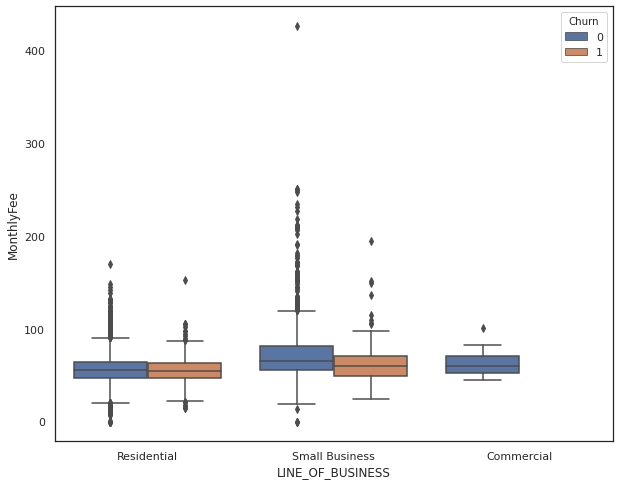

In [18]:
fig = plt.subplots(figsize=(10,8))
sns.boxplot(x = 'LINE_OF_BUSINESS', y = 'MonthlyFee', hue = 'Churn', data = train)

In [19]:
outlier = train['MonthlyFee'].values

q25, q75 = np.percentile(outlier,25), np.percentile(outlier,75)
q25,q75
iqr = q75 - q25
iqr
thresh = iqr * 1.5
thresh
lower, upper = q25 - thresh, q75 + thresh
q25, q75, lower, upper

(46.605, 64.485, 19.784999999999993, 91.305)

In [20]:
train = train.drop(train[(train['MonthlyFee'] > upper) | (train['MonthlyFee'] < lower)].index)
train.shape

(14410, 15)

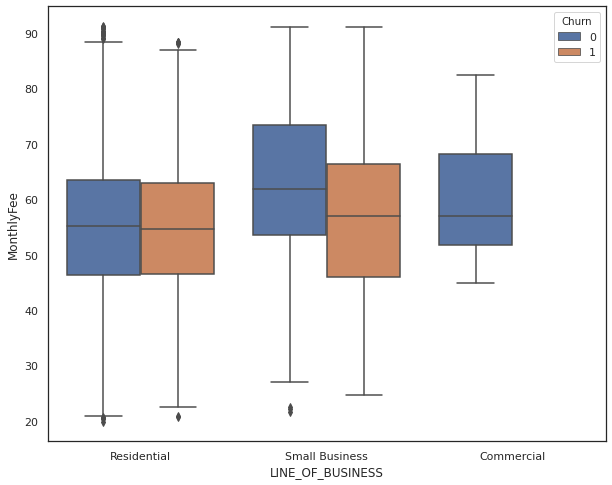

In [21]:
fig = plt.subplots(figsize=(10,8))
sns.boxplot(x = 'LINE_OF_BUSINESS', y = 'MonthlyFee', hue = 'Churn', data = train)

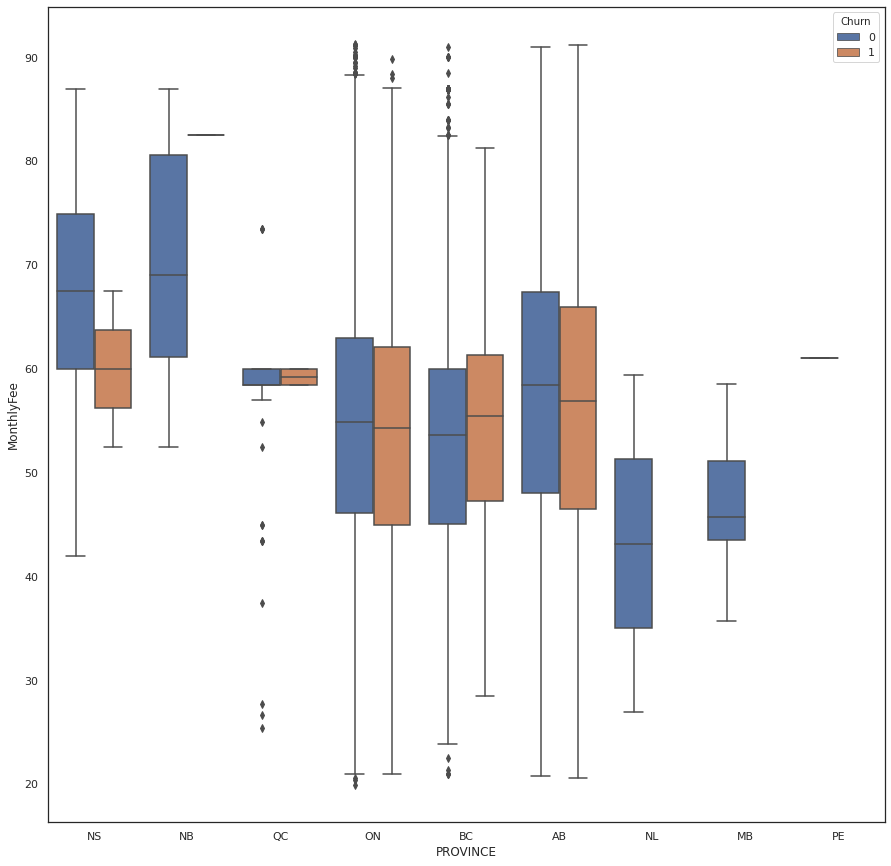

In [22]:
fig = plt.subplots(figsize=(15,15))
sns.boxplot(x = 'PROVINCE', y = 'MonthlyFee', hue = 'Churn', data = train)

In [23]:
print('Not Churn:',round(train['Churn'].value_counts()[0] / len(train)*100,2),'%')
print('Churn:',round(train['Churn'].value_counts()[1] / len(train)*100,2),'%')

Not Churn: 94.75 %
Churn: 5.25 %


Text(0.5, 1.0, 'Class distribution 0:No Churn | 1: Churn')

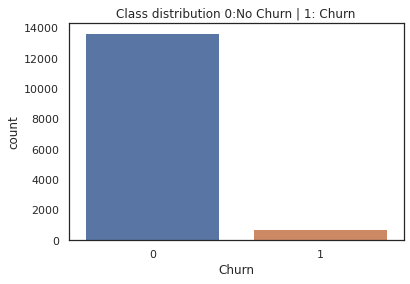

In [24]:
sns.countplot('Churn', data=train)
plt.title('Class distribution 0:No Churn | 1: Churn')

Text(0.5, 1.0, '# of Customers by Line of Business')

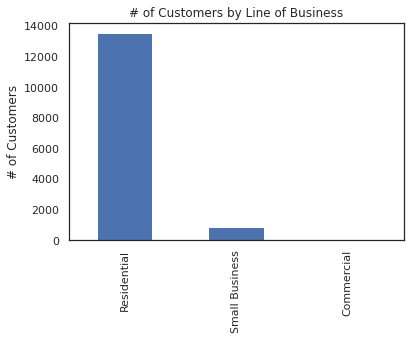

In [25]:
ax = train['LINE_OF_BUSINESS'].value_counts().plot(kind='bar')
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Line of Business')

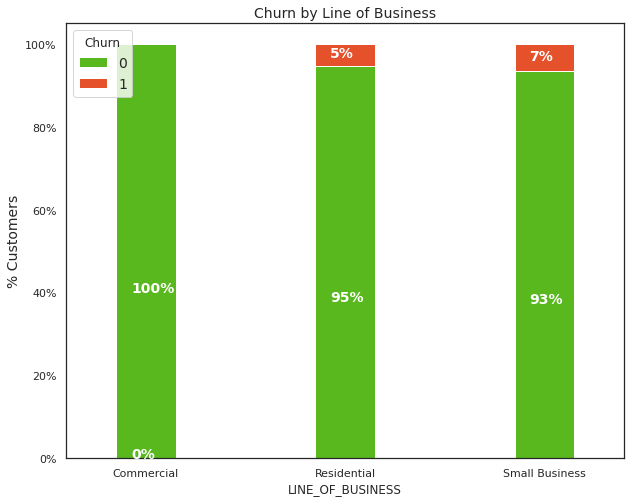

In [26]:
colors = ['#58b81d','#E4512B']
LOB_churn = train.groupby(['LINE_OF_BUSINESS','Churn']).size().unstack()

ax = (LOB_churn.T*100.0 / LOB_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Line of Business',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Customers by Bill Freq')

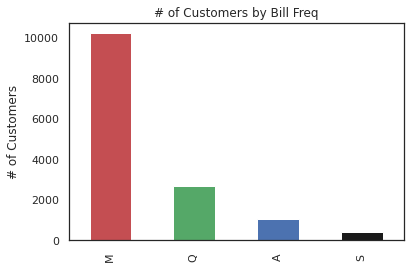

In [27]:
ax = train['BillFreq'].value_counts().plot(kind='bar',color = list('rgbkymc'))
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Bill Freq')

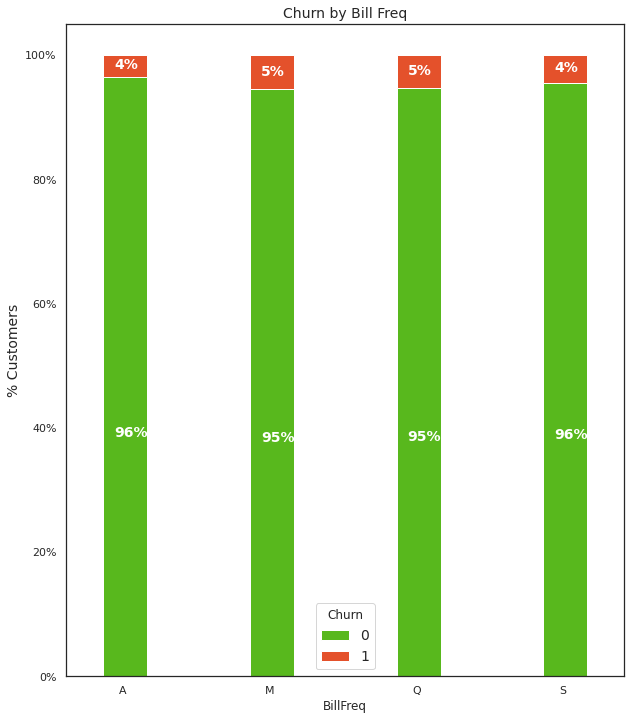

In [28]:
colors = ['#58b81d','#E4512B']
BF_churn = train.groupby(['BillFreq','Churn']).size().unstack()

ax = (BF_churn.T*100.0 / BF_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,12),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Bill Freq',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Customers by GroupName')

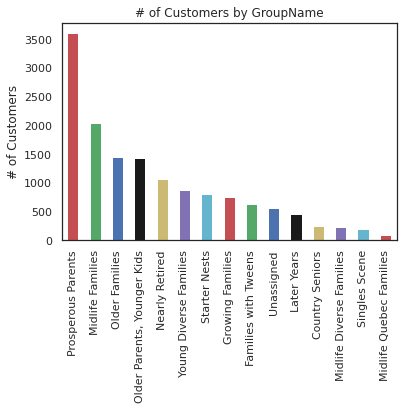

In [29]:
ax = train['GroupName'].value_counts().plot(kind='bar',color = list('rgbkymc'))
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by GroupName')

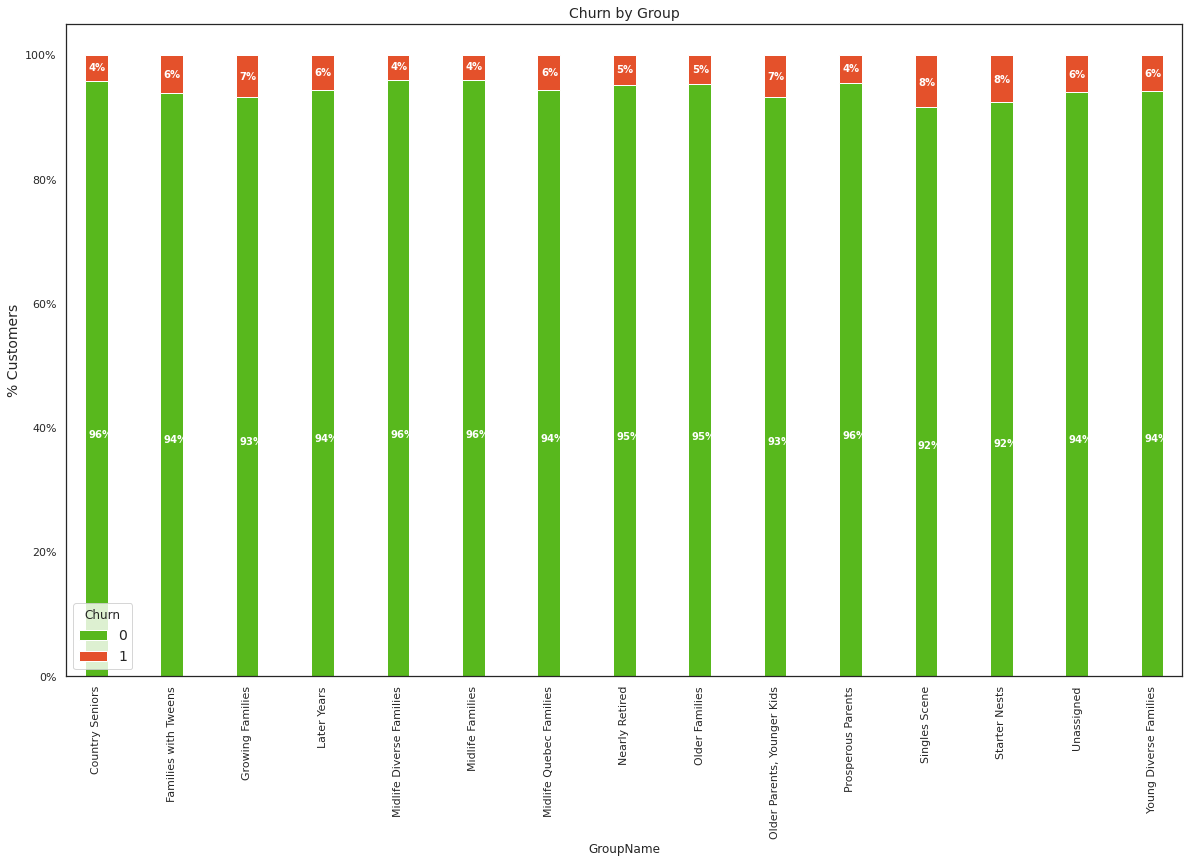

In [30]:
colors = ['#58b81d','#E4512B']
GN_churn = train.groupby(['GroupName','Churn']).size().unstack()
ax = (GN_churn.T*100.0 / GN_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (20,12),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
plt.xticks(rotation=90)
ax.set_title('Churn by Group',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

Text(0.5, 1.0, '# of Customers by Service Call Freq')

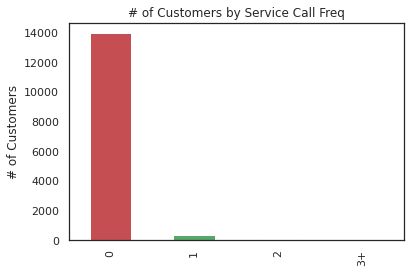

In [31]:
ax = train['CustomerServiceCall'].value_counts().plot(kind='bar',color = list('rgbkymc'))
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Service Call Freq')

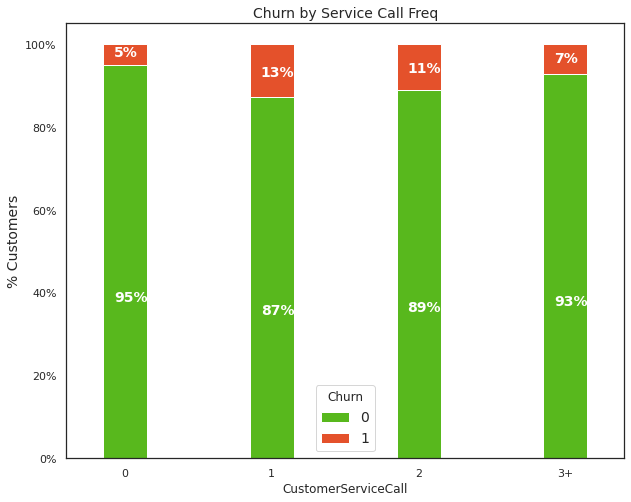

In [32]:
colors = ['#58b81d','#E4512B']
CS_churn = train.groupby(['CustomerServiceCall','Churn']).size().unstack()

ax = (CS_churn.T*100.0 / CS_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Service Call Freq',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, '# of Customers by Segment')

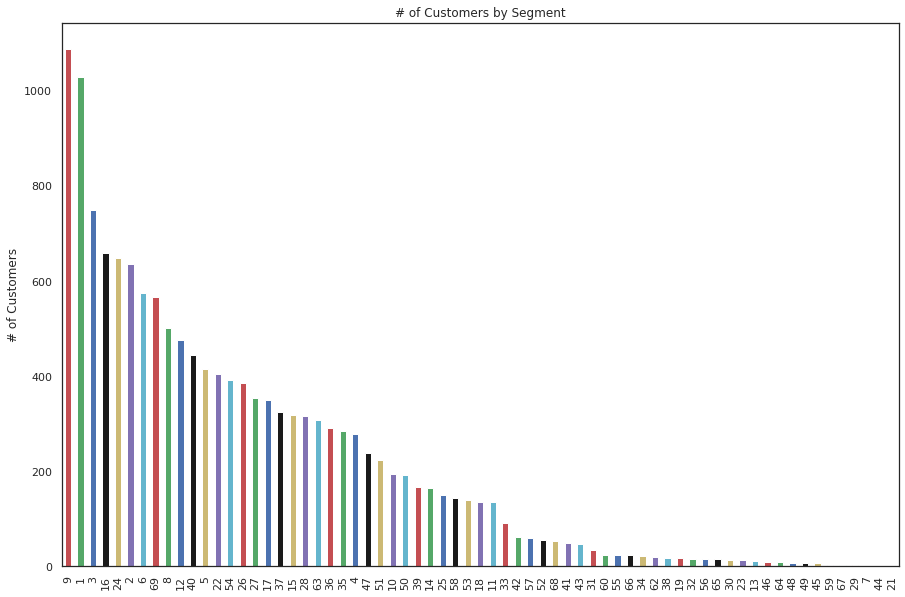

In [33]:
plt.figure(figsize=(15,10))
ax = train['Segment'].value_counts().plot(kind='bar',color = list('rgbkymc'))
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Segment')

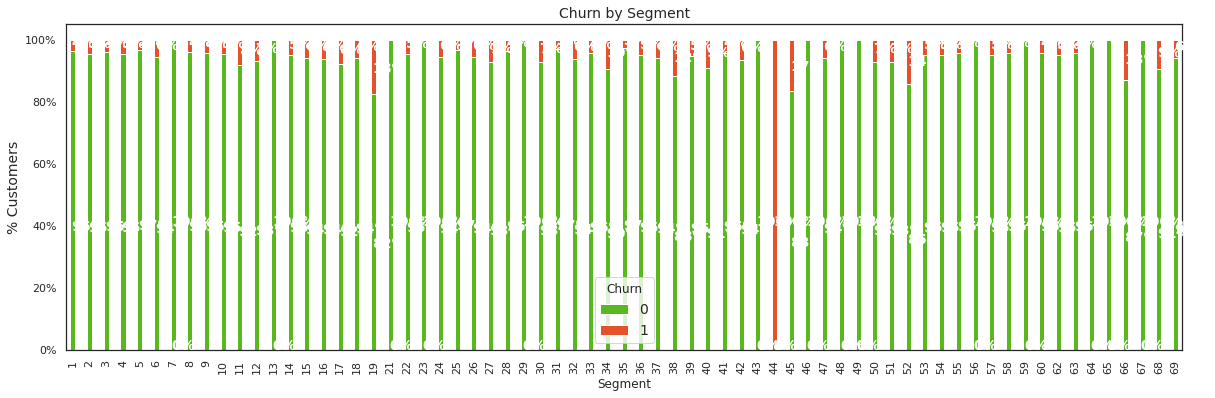

In [34]:
colors = ['#58b81d','#E4512B']
SG_churn = train.groupby(['Segment','Churn']).size().unstack()
ax = (SG_churn.T*100.0 / SG_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (20,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
plt.xticks(rotation=90)
ax.set_title('Churn by Segment',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Text(0.5, 1.0, 'Distribution of monthly fee by churn')

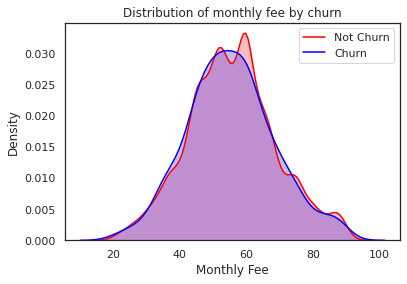

In [35]:
ax = sns.kdeplot(train['MonthlyFee'][(train["Churn"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(train['MonthlyFee'][(train["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Fee')
ax.set_title('Distribution of monthly fee by churn')

In [36]:
train_dummy = pd.get_dummies(train)
train_dummy.head()

,MonthlyFee,Segment,FalseAlarm,Service1,Service2,Service3,Service4,Service5,Service6,Churn,...,GroupName_Unassigned,GroupName_Young Diverse Families,CustomerServiceCall_0,CustomerServiceCall_1,CustomerServiceCall_2,CustomerServiceCall_3+,BillFreq_A,BillFreq_M,BillFreq_Q,BillFreq_S
0,67.485,58,0,1,0,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,42.000,47,1,1,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,59.985,68,1,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,74.985,50,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,58.425,55,0,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


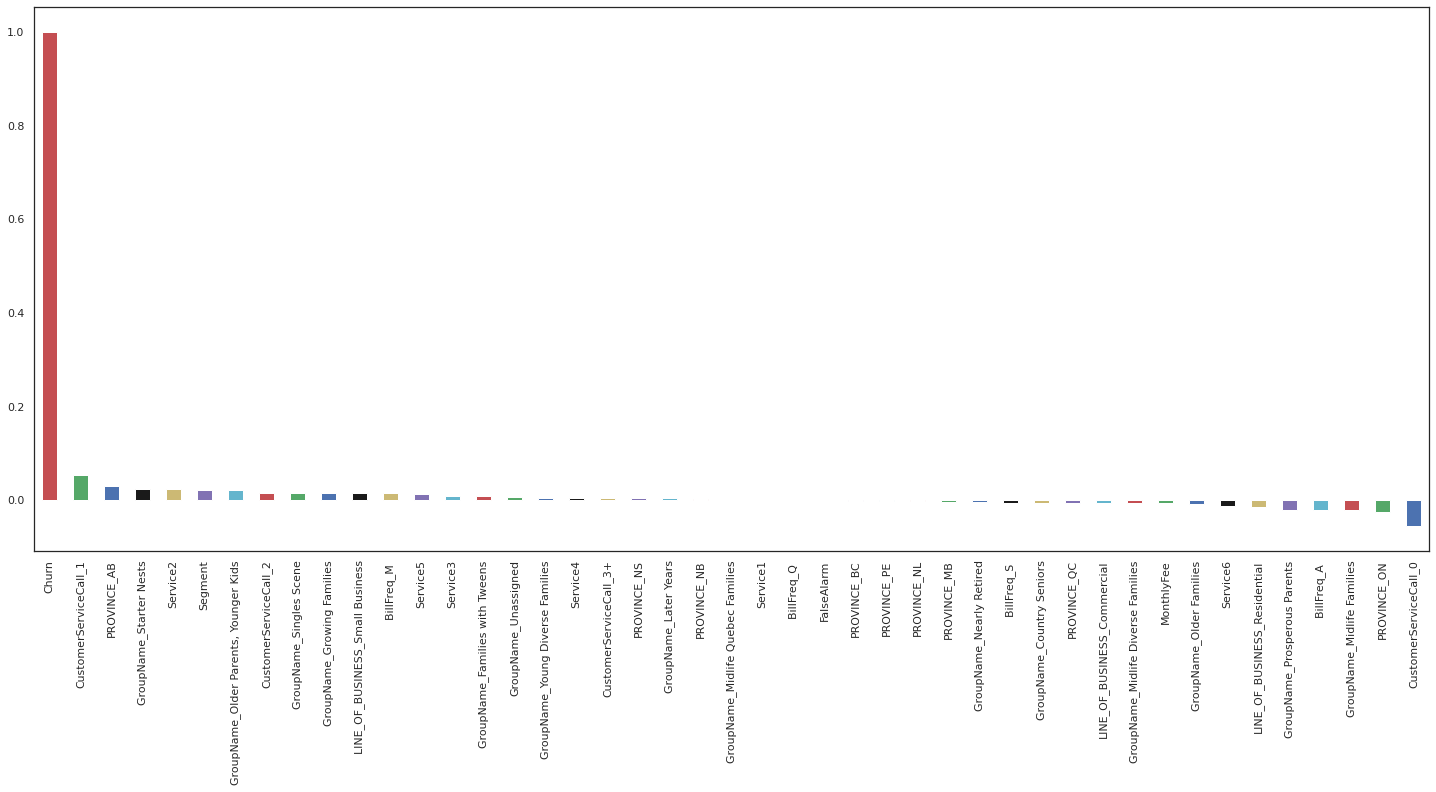

In [37]:
plt.figure(figsize=(25,10))
train_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',color = list('rgbkymc'))

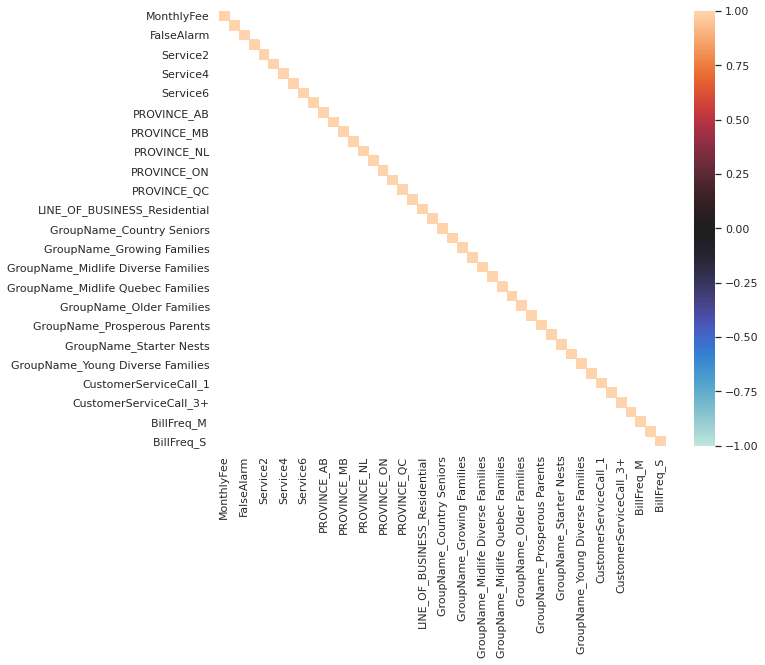

In [38]:
fig = plt.subplots(figsize=(10,8))
corrmat = train_dummy.corr()
sns.heatmap(corrmat[corrmat > 0.8], vmin = -1, vmax=1, center = 0)

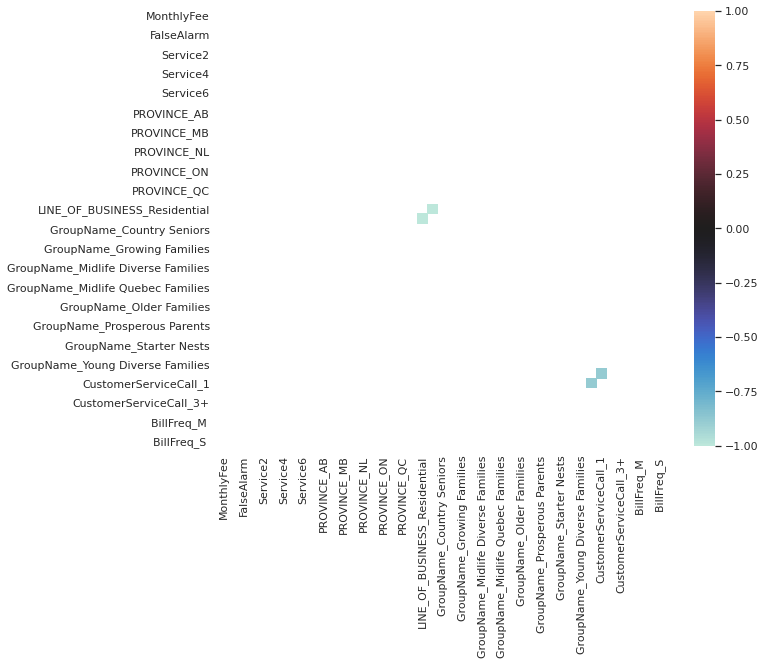

In [39]:
fig = plt.subplots(figsize=(10,8))
corrmat = train_dummy.corr()
sns.heatmap(corrmat[corrmat < -0.8], vmin = -1, vmax=1, center = 0)

In [40]:
X = train_dummy.drop(['Churn'], axis=1)
y = train_dummy['Churn']

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
columns = X.columns.values
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = columns)
X.head()

,MonthlyFee,Segment,FalseAlarm,Service1,Service2,Service3,Service4,Service5,Service6,PROVINCE_AB,...,GroupName_Unassigned,GroupName_Young Diverse Families,CustomerServiceCall_0,CustomerServiceCall_1,CustomerServiceCall_2,CustomerServiceCall_3+,BillFreq_A,BillFreq_M,BillFreq_Q,BillFreq_S
0,0.666737,0.838235,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.309729,0.676471,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.561673,0.985294,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.771801,0.720588,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.539819,0.794118,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [43]:
from collections import Counter
Counter(y_train)

Counter({0: 9550, 1: 537})

In [44]:
Counter(y_test)

Counter({0: 4104, 1: 219})

In [45]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 9550, 1: 537})
The number of classes after fit Counter({0: 9211, 1: 6823})


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, accuracy_score, f1_score,recall_score, precision_recall_curve, auc, roc_curve

In [47]:
Classifiers = {'lr': LogisticRegression(), 
               'knn': KNeighborsClassifier(), 
               'svc': SVC(),
               'dt': DecisionTreeClassifier(),
               'rf': RandomForestClassifier(),
               'adb': AdaBoostClassifier(),
               'xgb': XGBClassifier()
              }

for key, classifier in Classifiers.items():
    classifier.fit(X_train_ns,y_train_ns)
    y_pred = classifier.predict(X_test)
    print('Classifier', key,':')
    print(classification_report(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classifier lr :
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4104
           1       0.08      0.27      0.12       219

    accuracy                           0.80      4323
   macro avg       0.52      0.55      0.50      4323
weighted avg       0.91      0.80      0.85      4323

Classifier knn :
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4104
           1       0.06      0.20      0.09       219

    accuracy                           0.80      4323
   macro avg       0.50      0.51      0.49      4323
weighted avg       0.91      0.80      0.85      4323

Classifier svc :
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4104
           1       0.07      0.15      0.09       219

    accuracy                           0.85      4323
   macro avg       0.51      0.52      0.51      4323
weighted avg       0.91 

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train_ns,y_train_ns)
y_pred = logreg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,0,1
0,3405,699
1,160,59


In [49]:
logreg = LogisticRegression()

params = {'C': [0.001,0.01,0.1,1,1]}

gcv = GridSearchCV(estimator=logreg, param_grid = params, cv=3,scoring = 'recall') 
gcv.fit(X_train_ns,y_train_ns)

print('Best estimator:', gcv.best_estimator_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best estimator: LogisticRegression(C=1)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train_ns,y_train_ns)
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4104
           1       0.08      0.27      0.12       219

    accuracy                           0.80      4323
   macro avg       0.52      0.55      0.50      4323
weighted avg       0.91      0.80      0.85      4323



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [123]:
threshold = 0.49
y_predTHR = ((logreg.predict_proba(X_test)[:, 1])>= threshold).astype(int)

In [124]:
print('Valuation for test data only:')
print(classification_report(y_test, y_pred))
print("----------------------------------------------------------------------")
print('Valuation for test data only  (new_threshold):')
print(classification_report(y_test, y_predTHR))

Valuation for test data only:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      4104
           1       0.08      0.27      0.12       219

    accuracy                           0.80      4323
   macro avg       0.52      0.55      0.50      4323
weighted avg       0.91      0.80      0.85      4323

----------------------------------------------------------------------
Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      4104
           1       0.07      0.30      0.12       219

    accuracy                           0.77      4323
   macro avg       0.51      0.55      0.50      4323
weighted avg       0.91      0.77      0.83      4323



In [125]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

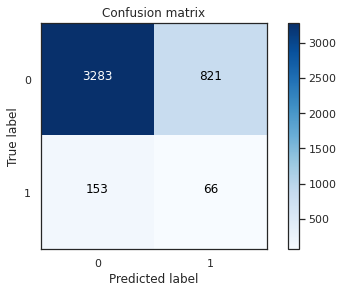

In [126]:
cm = confusion_matrix(y_test,y_predTHR)
class_names = [0,1]

plt.figure()
plot_confusion_matrix(cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [115]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

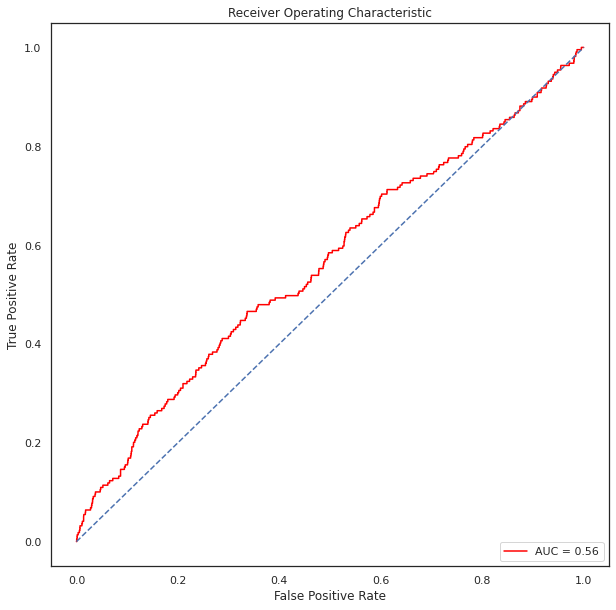

In [116]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

AxesSubplot(0.125,0.125;0.775x0.755)


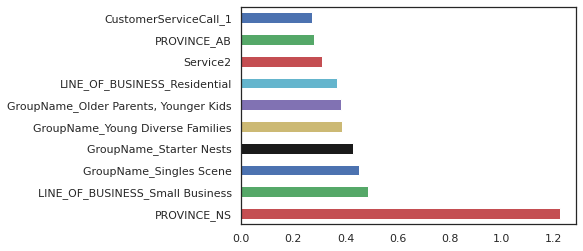

In [127]:
weights = pd.Series(logreg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='barh',color = list('rgbkymc')))

AxesSubplot(0.125,0.125;0.775x0.755)


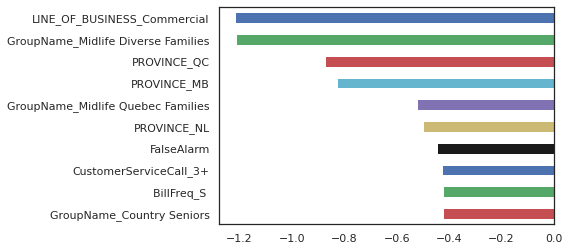

In [128]:
weights = pd.Series(logreg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[-10:].plot(kind='barh',color = list('rgbkymc')))

In [129]:
score = pd.read_excel('../input/churn-model/ChurnModel - Scoring DB 20201015.xlsx','Sheet1')

In [130]:
score.head()

,SK_CUSTOMER,Contact_End,StartDate,MonthlyFee,PROVINCE,LINE_OF_BUSINESS,Segment,GroupName,CustomerServiceCall,FalseAlarm,BillFreq,Service1,Service2,Service3,Service4,Service5,Service6
0,2,2022-09-07,2017-09-05 17:45:00,67.485,NS,Residential,17.0,Growing Families,1,0,M,1,0,1,1,1,0
1,26,2020-09-01,2017-08-29 13:48:00,64.485,NB,Residential,22.0,Midlife Families,0,0,M,1,1,1,1,1,0
2,63,2020-10-03,2017-09-14 13:10:00,59.985,NS,Residential,17.0,Growing Families,0,0,M,1,1,1,1,1,0
3,81,2022-10-09,2017-10-07 17:43:00,58.425,QC,Residential,55.0,Families with Tweens,0,0,M,1,1,1,1,1,0
4,118,2020-10-19,2017-10-19 16:37:00,74.925,NS,Residential,54.0,Later Years,0,0,M,1,0,1,1,1,0


In [131]:
score.shape

(14994, 17)

In [132]:
missing_data = score.isnull().sum().sort_values(ascending=False)
percent = score.isnull().sum()/score.isnull().count().sort_values(ascending=False)
missing = pd.concat([missing_data, percent],axis=1, keys=('Total', 'Percent'))
missing.head(15)

,Total,Percent
GroupName,67,0.004468
Segment,67,0.004468
Service6,0,0.000000
Contact_End,0,0.000000
StartDate,0,0.000000
MonthlyFee,0,0.000000
PROVINCE,0,0.000000
LINE_OF_BUSINESS,0,0.000000
CustomerServiceCall,0,0.000000
Service5,0,0.000000


In [133]:
score['GroupName'].fillna(value='Unassigned',inplace=True)
score['Segment'].fillna(value=69,inplace=True)

In [134]:
cols = ['Segment', 'Service1', 'Service2', 'Service3', 'Service4', 'Service5', 'Service6'] 
score[cols] = score[cols].astype('int64')

In [135]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SK_CUSTOMER          14994 non-null  int64         
 1   Contact_End          14994 non-null  datetime64[ns]
 2   StartDate            14994 non-null  datetime64[ns]
 3   MonthlyFee           14994 non-null  float64       
 4   PROVINCE             14994 non-null  object        
 5   LINE_OF_BUSINESS     14994 non-null  object        
 6   Segment              14994 non-null  int64         
 7   GroupName            14994 non-null  object        
 8   CustomerServiceCall  14994 non-null  object        
 9   FalseAlarm           14994 non-null  int64         
 10  BillFreq             14994 non-null  object        
 11  Service1             14994 non-null  int64         
 12  Service2             14994 non-null  int64         
 13  Service3             14994 non-

In [136]:
ID_score = score['SK_CUSTOMER']

In [137]:
cols_drop = ['SK_CUSTOMER','Contact_End','StartDate']
score.drop(cols_drop, axis=1, inplace=True)

In [138]:
score_dummy = pd.get_dummies(score) 
score_dummy.head()

,MonthlyFee,Segment,FalseAlarm,Service1,Service2,Service3,Service4,Service5,Service6,PROVINCE_AB,...,GroupName_Unassigned,GroupName_Young Diverse Families,CustomerServiceCall_0,CustomerServiceCall_1,CustomerServiceCall_2,CustomerServiceCall_3+,BillFreq_A,BillFreq_M,BillFreq_Q,BillFreq_S
0,67.485,17,0,1,0,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,64.485,22,0,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,59.985,17,0,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,58.425,55,0,1,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,74.925,54,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [139]:
columns = score_dummy.columns.values 
X_score = pd.DataFrame(scaler.transform(score_dummy), columns = columns) 
X_score.head()

,MonthlyFee,Segment,FalseAlarm,Service1,Service2,Service3,Service4,Service5,Service6,PROVINCE_AB,...,GroupName_Unassigned,GroupName_Young Diverse Families,CustomerServiceCall_0,CustomerServiceCall_1,CustomerServiceCall_2,CustomerServiceCall_3+,BillFreq_A,BillFreq_M,BillFreq_Q,BillFreq_S
0,0.666737,0.235294,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.624711,0.308824,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.561673,0.235294,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.539819,0.794118,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.770960,0.779412,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [140]:
pred = logreg.predict(X_score)
prob = logreg.predict_proba(X_score)

In [141]:
prob

array([[0.24061618, 0.75938382],
       [0.66717366, 0.33282634],
       [0.29559568, 0.70440432],
       ...,
       [0.43958081, 0.56041919],
       [0.73924387, 0.26075613],
       [0.59877769, 0.40122231]])

In [142]:
submission = pd.read_excel('../input/churn-model/ChurnModel - Scoring DB 20201015.xlsx','Sheet1')

In [143]:
submission['Churn'] = pred
submission['Churn_probability'] = prob[:,1]
submission.head()

,SK_CUSTOMER,Contact_End,StartDate,MonthlyFee,PROVINCE,LINE_OF_BUSINESS,Segment,GroupName,CustomerServiceCall,FalseAlarm,BillFreq,Service1,Service2,Service3,Service4,Service5,Service6,Churn,Churn_probability
0,2,2022-09-07,2017-09-05 17:45:00,67.485,NS,Residential,17.0,Growing Families,1,0,M,1,0,1,1,1,0,1,0.759384
1,26,2020-09-01,2017-08-29 13:48:00,64.485,NB,Residential,22.0,Midlife Families,0,0,M,1,1,1,1,1,0,0,0.332826
2,63,2020-10-03,2017-09-14 13:10:00,59.985,NS,Residential,17.0,Growing Families,0,0,M,1,1,1,1,1,0,1,0.704404
3,81,2022-10-09,2017-10-07 17:43:00,58.425,QC,Residential,55.0,Families with Tweens,0,0,M,1,1,1,1,1,0,0,0.352624
4,118,2020-10-19,2017-10-19 16:37:00,74.925,NS,Residential,54.0,Later Years,0,0,M,1,0,1,1,1,0,1,0.574468


In [144]:
print('Not Churn:',round(submission['Churn'].value_counts()[0] / len(submission)*100,2),'%')
print('Churn:',round(submission['Churn'].value_counts()[1] / len(submission)*100,2),'%')

Not Churn: 82.27 %
Churn: 17.73 %


Text(0.5, 1.0, 'Class distribution 0:No Churn | 1: Churn')

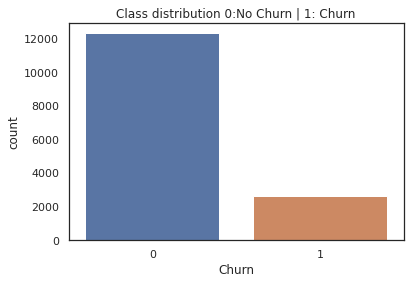

In [145]:
sns.countplot('Churn', data=submission)
plt.title('Class distribution 0:No Churn | 1: Churn')

In [146]:
submission.to_excel("output.xlsx",sheet_name='Sheet' ,index=False)